In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [3]:
nab = gpd.read_file('../data/Neighborhood_Association_Boundaries.geojson')
print(nab.crs)
nab.head( )

epsg:4326


,name,geometry
0,Historic Buena Vista,"MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ..."
1,Charlotte Park,"MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ..."
2,Hillwood,"MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ..."
3,East Hill,"MULTIPOLYGON (((-86.74659 36.20376, -86.74559 ..."
4,Cleveland Park,"MULTIPOLYGON (((-86.75606 36.18857, -86.75600 ..."


In [4]:
type(nab)

geopandas.geodataframe.GeoDataFrame

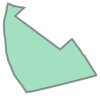

In [5]:
nab.loc[0, 'geometry']

In [6]:
print(nab.loc[0, 'geometry'])

MULTIPOLYGON (((-86.79511056795417 36.17575964963348, -86.79403325521203 36.17672381962277, -86.79395847673587 36.17673420120556, -86.79373059621346 36.17641850227536, -86.79345684770965 36.1760073285478, -86.7933653702227 36.17592609720739, -86.79294909679425 36.17527664780614, -86.79276591717007 36.17511962002857, -86.79252941560033 36.17471240878589, -86.79204396927803 36.17393170332863, -86.79167790414918 36.17334940652481, -86.7916936044697 36.17329298843413, -86.79203101691085 36.1731861114189, -86.79474163086816 36.17249213438422, -86.79601903802255 36.17218267273473, -86.79764416397879 36.17179978743778, -86.79830164245051 36.17168336043859, -86.79879977448026 36.17243166386886, -86.79924036890505 36.1729960002125, -86.79949254372757 36.1733962443001, -86.79962585216791 36.17371402180879, -86.79978177579596 36.17412395085653, -86.8000340272343 36.17467828643516, -86.80014485213776 36.17518521060327, -86.80021778306909 36.17542866685226, -86.80031177458922 36.17668510380093, -86

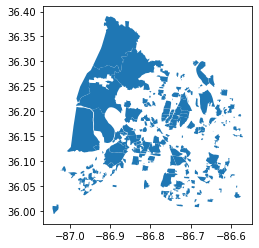

In [7]:
nab.plot();

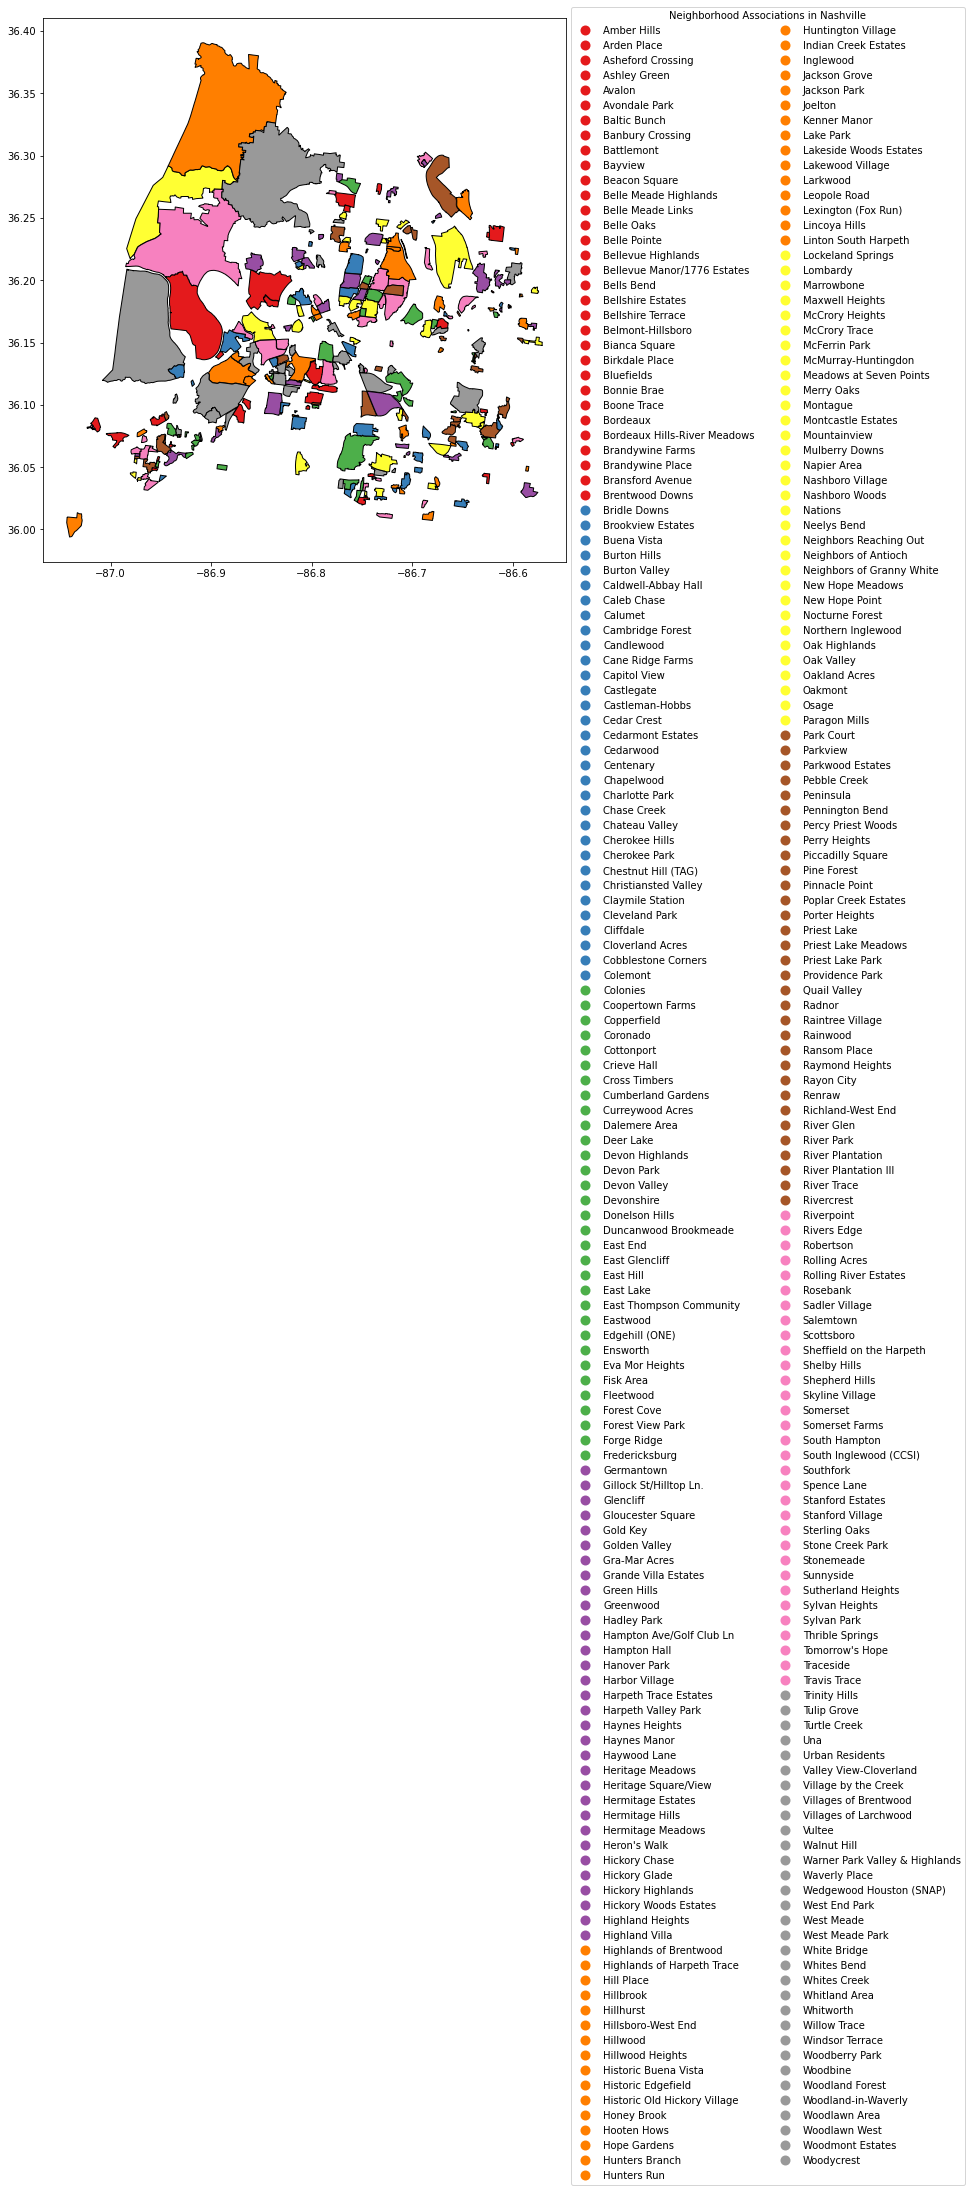

In [10]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Neighborhood Associations in Nashville', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

nab.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set1')
plt.show()

In [23]:
cont = pd.read_csv('../data/Registered_Professional_Contractors.csv')
print(cont.shape)
cont.head(3)

(26617, 15)


,Company Name,Profession Type,Address,City,State,ZIP,Phone,Fax,Alternate Phone,Email,Last Permit Date,Mapped Location,lat long,lat,long
0,REFINED HOMES LLC,Master Contractor,7053 PENBROOK DRIVE,FRANKLIN,TN,37069,6158383140,NaN,NaN,NaN,NaN,"7053 PENBROOK DRIVE\nFRANKLIN, TN 37069\n(35.9...","(35.962787, -86.890237)",35.962787,-86.890237
1,REFINED HOMES LLC,State Residential Building,7053 PENBROOK DRIVE,FRANKLIN,TN,37069,6158383140,NaN,NaN,NaN,NaN,"7053 PENBROOK DRIVE\nFRANKLIN, TN 37069\n(35.9...","(35.962787, -86.890237)",35.962787,-86.890237
2,REFINED HOMES LLC,General Contractor License,7053 PENBROOK DRIVE,FRANKLIN,TN,37069,6158383140,NaN,NaN,NaN,NaN,"7053 PENBROOK DRIVE\nFRANKLIN, TN 37069\n(35.9...","(35.962787, -86.890237)",35.962787,-86.890237


In [24]:
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26617 entries, 0 to 26616
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company Name      26617 non-null  object 
 1   Profession Type   26617 non-null  object 
 2   Address           26469 non-null  object 
 3   City              26613 non-null  object 
 4   State             26609 non-null  object 
 5   ZIP               25980 non-null  object 
 6   Phone             26321 non-null  object 
 7   Fax               10962 non-null  object 
 8   Alternate Phone   3246 non-null   object 
 9   Email             22293 non-null  object 
 10  Last Permit Date  0 non-null      float64
 11  Mapped Location   26617 non-null  object 
 12  lat long          26617 non-null  object 
 13  lat               26617 non-null  float64
 14  long              26617 non-null  float64
dtypes: float64(3), object(12)
memory usage: 3.0+ MB


In [25]:
cont['geometry'] = cont.apply(lambda x: Point((x.long, 
                                                         x.lat)), 
                                        axis=1)
cont.head(3)

,Company Name,Profession Type,Address,City,State,ZIP,Phone,Fax,Alternate Phone,Email,Last Permit Date,Mapped Location,lat long,lat,long,geometry
0,REFINED HOMES LLC,Master Contractor,7053 PENBROOK DRIVE,FRANKLIN,TN,37069,6158383140,NaN,NaN,NaN,NaN,"7053 PENBROOK DRIVE\nFRANKLIN, TN 37069\n(35.9...","(35.962787, -86.890237)",35.962787,-86.890237,POINT (-86.890237 35.962787)
1,REFINED HOMES LLC,State Residential Building,7053 PENBROOK DRIVE,FRANKLIN,TN,37069,6158383140,NaN,NaN,NaN,NaN,"7053 PENBROOK DRIVE\nFRANKLIN, TN 37069\n(35.9...","(35.962787, -86.890237)",35.962787,-86.890237,POINT (-86.890237 35.962787)
2,REFINED HOMES LLC,General Contractor License,7053 PENBROOK DRIVE,FRANKLIN,TN,37069,6158383140,NaN,NaN,NaN,NaN,"7053 PENBROOK DRIVE\nFRANKLIN, TN 37069\n(35.9...","(35.962787, -86.890237)",35.962787,-86.890237,POINT (-86.890237 35.962787)


In [26]:
nab.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
cont_geo = gpd.GeoDataFrame(cont, 
                           crs = nab.crs, 
                           geometry = cont['geometry'])

In [28]:
type(cont_geo)

geopandas.geodataframe.GeoDataFrame

In [29]:
nab = nab[['name', 'geometry']]

In [30]:
cont_by_neighborhood = gpd.sjoin(cont_geo, nab, op = 'within')

In [31]:
cont_by_neighborhood.head()

,Company Name,Profession Type,Address,City,State,ZIP,Phone,Fax,Alternate Phone,Email,Last Permit Date,Mapped Location,lat long,lat,long,geometry,index_right,name
15,"JBT CONSTRUCTION, LLC",Excavation Contractor,167 ANTIOCH PIKE,NASHVILLE,TN,37211,615-445-5723,615-776-2675,NaN,jtidwel5@gmail.com,NaN,"167 ANTIOCH PIKE\nNASHVILLE, TN 37211\n(36.100...","(36.100874, -86.729312)",36.100874,-86.729312,POINT (-86.72931 36.10087),225,Glencliff
4221,"GONZALES, PEDRO G.",Master Contractor,3111 SOUTHLAKE DR,NASHVILLE,TN,37210,6194834136,NaN,NaN,DALEHIRE@HOTMAIL.COM,NaN,"3111 SOUTHLAKE DR\nNASHVILLE, TN 37210\n(36.10...","(36.106009, -86.728838)",36.106009,-86.728838,POINT (-86.72884 36.10601),225,Glencliff
4222,"GONZALES, PEDRO G.",State Residential Restricted To $125K,3111 SOUTHLAKE DR,NASHVILLE,TN,37210,6194834136,NaN,NaN,DALEHIRE@HOTMAIL.COM,NaN,"3111 SOUTHLAKE DR\nNASHVILLE, TN 37210\n(36.10...","(36.106009, -86.728838)",36.106009,-86.728838,POINT (-86.72884 36.10601),225,Glencliff
4223,"GONZALES, PEDRO G.",General Contractor License,3111 SOUTHLAKE DR,NASHVILLE,TN,37210,6194834136,NaN,NaN,DALEHIRE@HOTMAIL.COM,NaN,"3111 SOUTHLAKE DR\nNASHVILLE, TN 37210\n(36.10...","(36.106009, -86.728838)",36.106009,-86.728838,POINT (-86.72884 36.10601),225,Glencliff
4224,BAIRD ELECTRIC SERVICE,Low Voltage Installation,3023 NOLENSVILLE PIKE - SUITE F,NASHVILLE,TN,37211,(615)834-1409,(615)333-7610,NaN,BAIRDELECTRICSERVICE@COMCAST.NET,NaN,"3023 NOLENSVILLE PIKE - SUITE F\nNASHVILLE, TN...","(36.105894, -86.74263)",36.105894,-86.740000,POINT (-86.74000 36.10589),225,Glencliff


In [32]:
cont_by_neighborhood['name'].value_counts()

Nations           120
Joelton           109
Glencliff          93
Inglewood          90
Radnor             85
                 ... 
River Glen          3
Highland Villa      2
Golden Valley       2
Quail Valley        2
Renraw              2
Name: name, Length: 147, dtype: int64

In [34]:
cont_in_nations = cont_by_neighborhood.loc[cont_by_neighborhood['name'] == 'Nations']
cont_in_nations.shape

(120, 18)

In [35]:
polygonnations = nab.loc[nab['name'] == 'Nations']
polygonnations.shape

(1, 2)

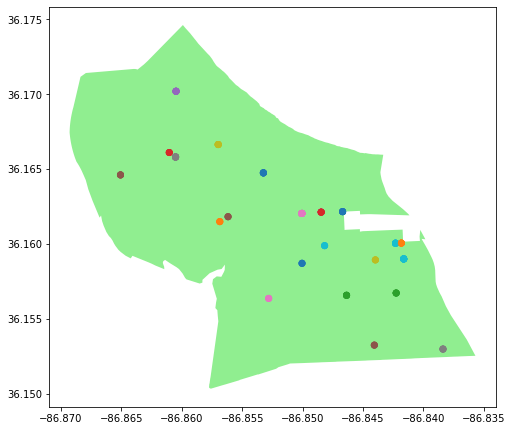

In [36]:
ax = polygonnations.plot(figsize = (8, 10), color = 'lightgreen')
cont_in_nations.plot( ax = ax, column = 'Company Name');
plt.show();

In [37]:
polygonnations.geometry.centroid

C:\Users\phili\AppData\Local\Temp\ipykernel_16112\1979495105.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygonnations.geometry.centroid


242    POINT (-86.85394 36.16166)
dtype: geometry

In [38]:
center = polygonnations.geometry.centroid[242]
print(center)

POINT (-86.85393985218928 36.16166405684432)


C:\Users\phili\AppData\Local\Temp\ipykernel_16112\3701787716.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygonnations.geometry.centroid[242]


In [39]:
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.16166405684432, -86.85393985218928]


In [40]:
map_nations = folium.Map(location =  area_center, zoom_start = 12)
map_nations

In [41]:
i = 0
for row_index, row_values in cont_in_nations.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 1057
values are:
 
Company Name                               MCH CONSTRUCTION OF TN LLC
Profession Type                            General Contractor License
Address                                           5313 INDIANA AVENUE
City                                                        NASHVILLE
State                                                              TN
ZIP                                                             37209
Phone                                                      7692328770
Fax                                                               NaN
Alternate Phone                                                   NaN
Email                                   MCHCONSTRUCTIONOFTN@GAMIL.COM
Last Permit Date                                                  NaN
Mapped Location     5313 INDIANA AVENUE\nNASHVILLE, TN 37209\n(36....
lat long                                      (36.156356, -86.852811)
lat                                                         36

In [44]:
#draw our zip code area: 37207
map_nations = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygonnations).add_to(map_nations)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in cont_in_nations.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['Company Name'])
    icon=folium.Icon(color="blue",icon="wrench", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_nations)
map_nations.save('../maps/map_nations.html')

#display our map
map_nations

In [45]:
folium.Map?

In [46]:
cluster_map_nations = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_nations)

folium.GeoJson(polygonnations).add_to(cluster_map_nations)

# inside the loop add each marker to the cluster
for row_index, row_values in cont_in_nations.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['Company Name'])
    icon=folium.Icon(color="blue",icon="wrench", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_nations.save('../maps/cluster_map_nations.html')

cluster_map_nations

In [47]:
#draw our Neighborhood Association area: Nations
map_nations = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygonnations).add_to(map_nations)

#create a list of locations and pass them to FastMarkerCluster()
locations = cont_in_nations[['lat', 'long']].values.tolist()
map_nations.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_nations

Ok, but what if I tried doing this for every neighborhood association in nashville?????